# **NBA Shooting Stats**

### In this project, I use SQL to summarize a few basic insights regarding shooting around the league
### A few things to note: The 3-Pt shot wasn't introduced to the NBA until the 1979-80 season so that is when most of my analysis will start. Also, since the 2022-23 season is still in progress, I will be excluding that data from my queries. Lastly, the seasons are lable by the year in which they ended, e.g. season 2021 reffers to the season that started in 2020 and ended in 2021.

In [1]:
#Import Libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
#Read csv file into Pandas Dataframe
df = pd.read_csv('Database/Player Totals.csv')


In [3]:
#Open a connection with sqlite3
cnn = sqlite3.connect('shooters_gonna_shoot.db')

In [ ]:
#Create SQL Table called 'shooting'
df.to_sql('Player_Totals', cnn)

In [4]:
#Loading SQL extension and pointing connection to the database
%load_ext sql
%sql sqlite:///shooters_gonna_shoot.db

### Top 10 shooting teams in 2021-2022 season by %

In [5]:
%%sql

SELECT tm as Team, round(avg(e_fg_percent), 3) as "AVG FG %"
FROM Player_Totals
WHERE season == 2022
GROUP BY tm
ORDER BY 2 DESC
LIMIT 10;

 * sqlite:///shooters_gonna_shoot.db
Done.


Team,AVG FG %
CHI,0.558
GSW,0.542
MIN,0.541
LAC,0.538
IND,0.534
DEN,0.533
MIA,0.529
HOU,0.529
UTA,0.527
PHI,0.522


### Best 3-point shooter each season over the past 10 seasons 

In [6]:
%%sql

SELECT season, player, pos as Pos, tm as Team, max(x3p) as '3-PT Made', x3p_percent as '3-PT %'
FROM Player_Totals
WHERE season < 2023
GROUP BY season
ORDER BY 1 DESC
LIMIT 10;

 * sqlite:///shooters_gonna_shoot.db
Done.


season,player,Pos,Team,3-PT Made,3-PT %
2022,Stephen Curry,PG,GSW,285.0,0.38
2021,Stephen Curry,PG,GSW,337.0,0.421
2020,James Harden,SG,HOU,299.0,0.355
2019,James Harden,PG,HOU,378.0,0.368
2018,James Harden,SG,HOU,265.0,0.367
2017,Stephen Curry,PG,GSW,324.0,0.411
2016,Stephen Curry,PG,GSW,402.0,0.454
2015,Stephen Curry,PG,GSW,286.0,0.443
2014,Stephen Curry,PG,GSW,261.0,0.424
2013,Stephen Curry,PG,GSW,272.0,0.453


### Plotting the number of 3-Pt attempts taken each season from 1980-2022

In [9]:
#Run Query and store it in a variable
query = pd.read_sql_query('''
SELECT season as Season, SUM(x3pa) as "3-Pt Attempts"
FROM Player_Totals
WHERE season BETWEEN 1980 AND 2022
GROUP BY season
ORDER BY 1;''', cnn)
df = pd.DataFrame(query)

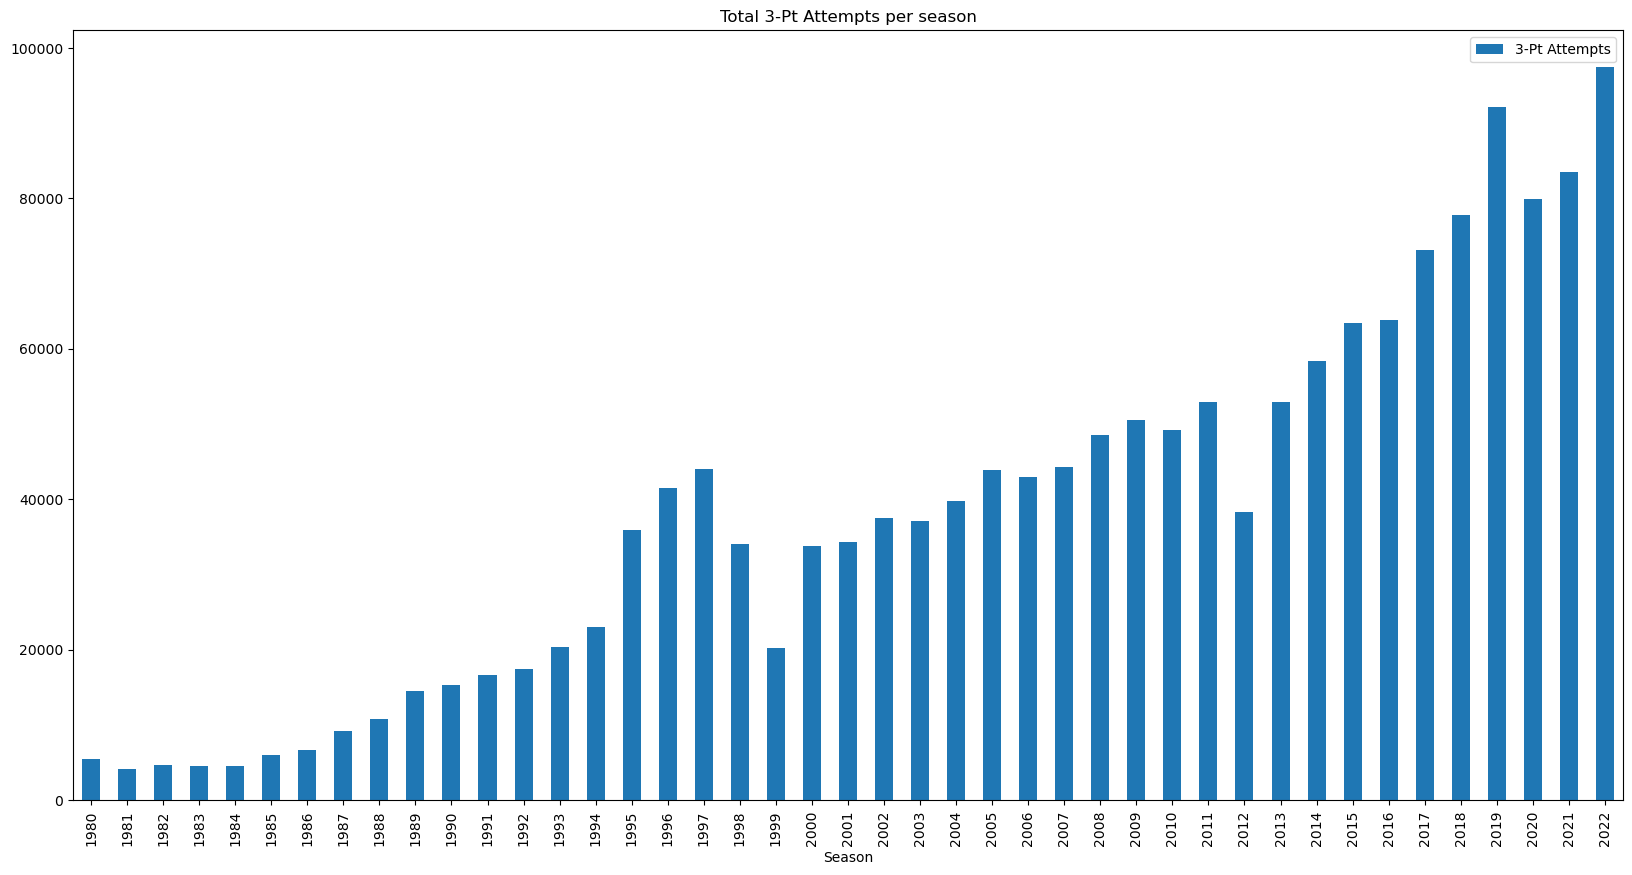

In [10]:
graph = df.plot(x='Season', y='3-Pt Attempts', kind='bar', title = 'Total 3-Pt Attempts per season', figsize = (20,10))
